<a href="https://colab.research.google.com/github/2303a51863/NLP/blob/main/LABEXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df=pd.read_csv('/content/sample_data/tweets.csv')
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [30]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = nltk.word_tokenize(text)
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(processed_tokens)
    else:
        return ""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['target'], test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,processed_text
3912,hell would want join kenyan cabinet would…
5902,citizen united wreaked havoc democracy democra...
11305,happiness sorrow guess id live today tomorrow ...
3691,remember cheer derailed campaign howard dean y...
11340,first listen also whip damn near wrecked


,processed_text
3495,many illegal building demolished city guadalaj...
5461,’ fatality tho
9794,onthisday 2018 chinese state medium confirmed ...
11105,luck miss windstorm either sidefly safe xxx
1803,inferno black friday 1939 71 death 3700 buildi...


,target
3912,0
5902,0
11305,0
3691,0
11340,0


,target
3495,0
5461,0
9794,1
11105,0
1803,1


In [26]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
mnb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [20]:
mnb_pred = mnb_model.predict(X_test_tfidf)
print(classification_report(y_test, mnb_pred))
print("Accuracy Score:", accuracy_score(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
           1       0.90      0.40      0.56       396

    accuracy                           0.89      2274
   macro avg       0.89      0.70      0.75      2274
weighted avg       0.89      0.89      0.87      2274

Accuracy Score: 0.8883025505716798


In [22]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

In [23]:
input_dim = X_train_tfidf.shape[1]
nn_model = create_nn_model(input_dim)
nn_model.fit(X_train_tfidf.toarray(), y_train_categorical, epochs=10, batch_size=32, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
nn_pred_prob = nn_model.predict(X_test_tfidf.toarray())
nn_pred = np.argmax(nn_pred_prob, axis=1)
print(classification_report(y_test, nn_pred))
print("Accuracy Score:", accuracy_score(y_test, nn_pred))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1878
           1       0.65      0.65      0.65       396

    accuracy                           0.88      2274
   macro avg       0.79      0.79      0.79      2274
weighted avg       0.88      0.88      0.88      2274

Accuracy Score: 0.8777484608619174


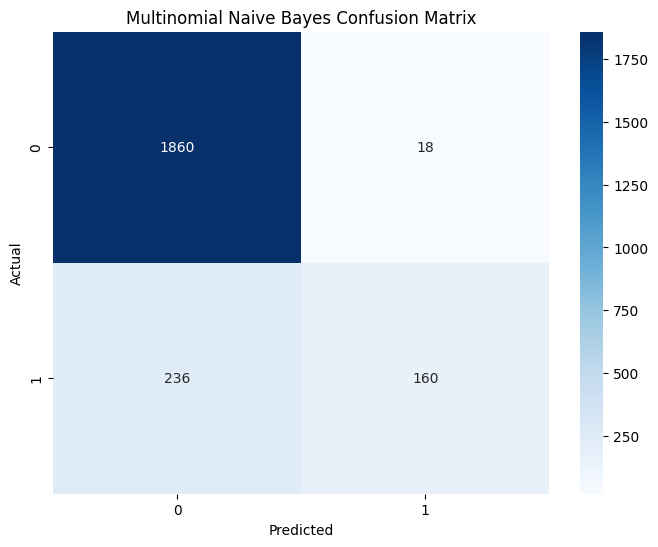

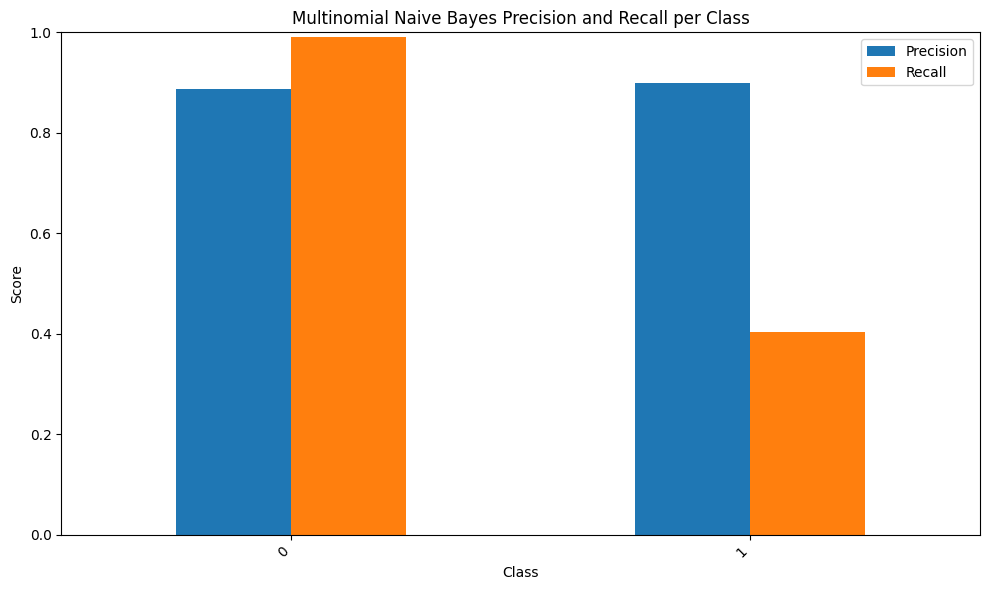

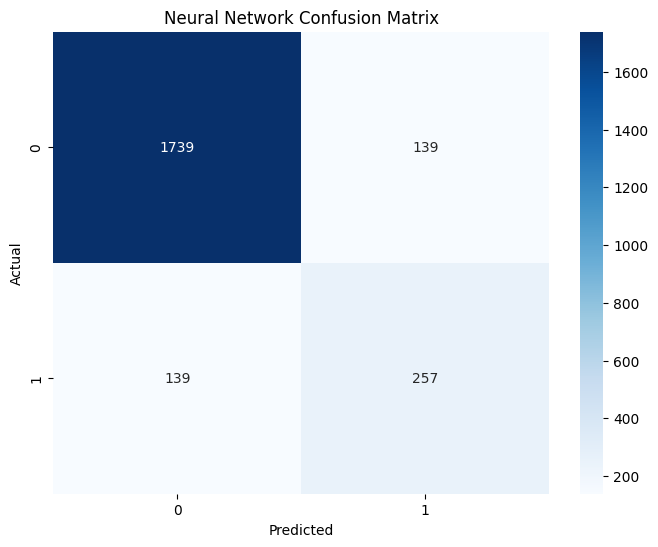

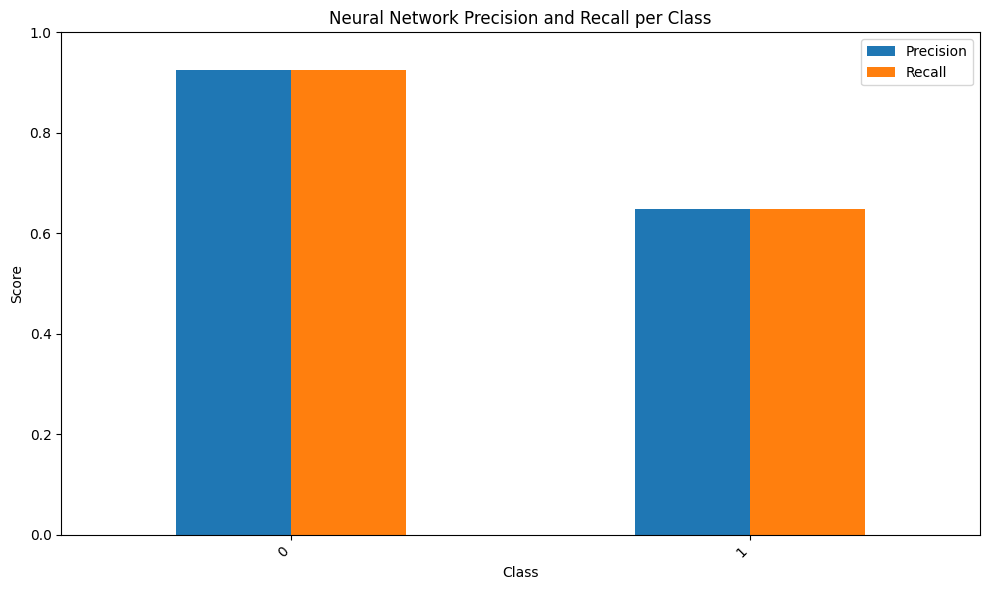

In [25]:
plot_confusion_matrix(y_test, mnb_pred, labels=[0, 1], title='Multinomial Naive Bayes Confusion Matrix')
plot_precision_recall_bars(y_test, mnb_pred, labels=[0, 1], title='Multinomial Naive Bayes Precision and Recall per Class')
plot_confusion_matrix(y_test, nn_pred, labels=[0, 1], title='Neural Network Confusion Matrix')
plot_precision_recall_bars(y_test, nn_pred, labels=[0, 1], title='Neural Network Precision and Recall per Class')